In [40]:
import numpy as np
import  sys
from numpy.linalg import matrix_power as mp
from numpy import linalg as LA
import matplotlib.pyplot as plt 

In [41]:
np.set_printoptions(threshold=sys.maxsize)

In [42]:
T = np.zeros([101,101])

In [43]:
D={
    1:39,
    4:14,
    9:31,
    28:84,
    36:44,
    51:67,
    80:100,
    71:91,
    16:6,
    47:26,
    49:11,
    56:53,
    64:60,
    92:73,
    95:75,
    98:78
}

a. Create the matrix T.

In [44]:
for key,values in D.items():
    T[values][key]=1
for j in range(101):
    if j in D.keys():
        pass
    else:
        T[j][j]=1

In [45]:
#T

b. Show that T is also a Markov matrix.

In [46]:

sum=0
j=80
for i in range (101):
    sum = sum +T[i][j]
np.allclose([sum],[1])

#checking if sum of all elements in a column is one 

True


sum of all the elements in a cloumn is 1 so M is a Matrix

problem 1.c

creating markov matrix as per question one below 

In [47]:
# creating markov matrix as per question one

M = np.zeros([101,101])
for i in range (101):
    for j in range (101):
        if ((i>j)&(i-j<7)):
            M[i][j]=1/6
for i in range(1,7):
    M[100,100-i]=(7-i)/6
M[100][100]=1
#print(M)

In [48]:
sum=0
j=80
for i in range (101):
    sum = sum +M[i][j]
np.allclose([sum],[1])

True

compting  matrix B

In [49]:
B=np.dot(T,M) 

#print(B)

In [50]:
sum=0
j=10
for i in range (101):
    sum = sum +B[i][j]
np.allclose([sum],[1])

True

In [51]:
X0 = np.zeros([101,1])
X0[0][0]=1
#print(X0)

In [52]:
#problem 1.d 
X1=np.dot(B,X0)
#print(X1)

In [53]:
def x_vector(k):
    m=mp(B, k)
    xk=np.dot(m,X0)
    return xk

In [54]:
#x_vector(20)

In [55]:
k=0
m=mp(B, k)
xj=X0
while True:
    k=k+1
    xk=np.dot(m,xj)
    if np.array_equal(xk,xj):
        steady_state=xk
        break

In [56]:
steady_state=np.stack(steady_state,axis=1)
first_eigen=LA.eig(M)[0] #first eigen vector 
print("first eigen",first_eigen)
print("steady state",steady_state)
np.allclose([steady_state],first_eigen) #check if they are equal

first eigen [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
steady state [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


True

It can be observed that first eigen vector of markov matrix is equal to the steady state vector 

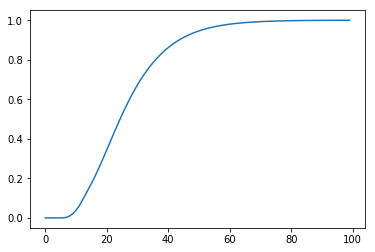

In [57]:
x=[]
y=[]
for k in range(100):
    x.append(k)
    y.append((x_vector(k)[100]))
plt.plot(x,y)
plt.show()

In [58]:
def p_exact(k):
    p=(x_vector(k)[100])-(x_vector(k-1)[100])
    return p

In [117]:
p_exact(50)

array([0.00547363])

expected number of steps to finish the game is  26.095330837187802


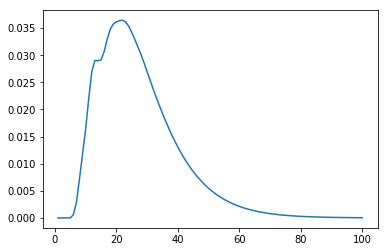

In [60]:
x=[]
y=[]
for k in range(1,101):
    x.append(k)
    y.append((p_exact(k)))
    
instance_prob=[]
for i in range(len(y)):
    instance_prob.append(y[i][0])
s=0
for j in range(len(instance_prob)):
    s += (j*instance_prob[j])
print("expected number of steps to finish the game is ",s)
plt.plot(x,y)
plt.show()